In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
from scipy.optimize import curve_fit
from sklearn.linear_model import LinearRegression

In [2]:
def exp_n(x,a,k,c):
  return a * np.exp(k*x) + c

def inv_exp(cond,a,k,c):
    return np.log( (cond - c) / a ) / k

In [3]:
def quad(x,a,b,c):
  return a * x**2 + b * x + c

def inv_quad_p(y,a,b,c):
  return - b/(2*a) + np.sqrt(b**2 - 4*a*(c-y))/(2*a)

def inv_quad_n(y,a,b,c):
  return - b/(2*a) - np.sqrt(b**2 - 4*a*(c-y))/(2*a)

In [4]:
# umemoto cal
m_um = 0.033
n_um = 0.033 / 340.07
vols = np.array([1,2,3,4,6,8])
concs_um = 1000 * n_um / vols
conds_um = np.array([7616,3310,2176,1625,1088,829])

In [5]:
concs_um

array([0.09703884, 0.04851942, 0.03234628, 0.02425971, 0.01617314,
       0.01212986])

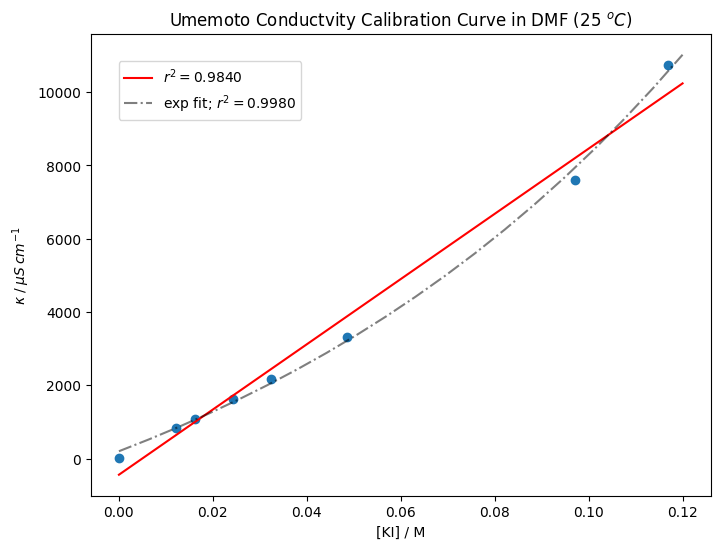

In [6]:
plt.figure(figsize=(8,6))

x = np.hstack((concs_um,np.array([0,0.117])))
y = np.hstack((conds_um,np.array([17.5,10750])))

plt.scatter(x,y)

xs = np.linspace(0,0.12,20)

# straight line fit
lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(x.reshape(-1,1),y.reshape(-1,1))
slope_um = lin_reg.coef_[0][0]
int_um = lin_reg.intercept_[0]
score_um = lin_reg.score(x.reshape(-1,1),y.reshape(-1,1))
plt.plot(xs,(slope_um*xs + int_um),'r-', label=f'$r^2 = {score_um:.4f}$' )

# HOW IS THIS ALSO SO BADLY CALIBRATED!!!

# exp fit
popt_exp, pcov = curve_fit( exp_n, x , y )
residuals = y - exp_n(x, *popt_exp)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((y-np.mean(y))**2)
s_exp = 1 - (ss_res / ss_tot)
plt.plot(xs,exp_n(xs,*popt_exp), 'k-.', alpha = 0.5, label=f'exp fit; $r^2 = {s_exp:.4f}$')

# quadratic fit
popt_q, pcov = curve_fit( quad, x , y )

# r^2
residuals2 = y - quad(x, *popt_q)
ss_res2 = np.sum(residuals2**2)
ss_tot2 = np.sum((y-np.mean(y))**2)
s2 = 1 - (ss_res2 / ss_tot2)
#plt.plot(xs,quad(xs,*popt_q), 'k.', alpha = 0.5, label=f'quadratic fit; $r^2 = {s2:.4f}$') # is about the same tbh

plt.title('Umemoto Conductvity Calibration Curve in DMF (25 $^oC$)')
plt.xlabel('[KI] / M')
plt.ylabel('$\kappa \hspace{.3} / \hspace{.3} \mu S \hspace{.2} cm^{-1}$')
plt.legend(borderaxespad=2)
plt.show()

In [7]:
with open('trifluoro_1.csv') as f:
    reader = csv.reader(f)
    data = list(reader)

In [8]:
vol = 12 + 0.32
um = 0.491 / 340.07
um_conc_og = 1000 * um / vol

In [9]:
um_conc_og

0.11719321346750994

In [10]:
data = np.array(data[0]).astype(float)

In [11]:
xs = np.array(range(len(data)))

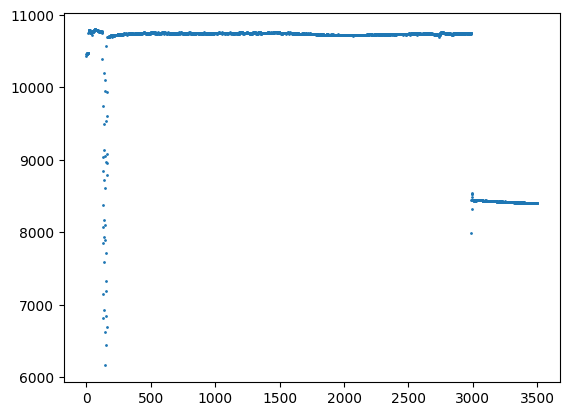

In [12]:
plt.scatter(xs[:3500],data[:3500],s=1,alpha=1,marker='o')
plt.show()

In [13]:
data[2970:3050 ]

array([10750., 10750., 10750., 10750., 10740., 10740., 10750., 10750.,
       10750., 10740., 10740., 10750., 10750., 10750., 10740., 10750.,
       10750., 10750.,  8447.,  7985.,  8320.,  8524.,  8546.,  8530.,
        8485.,  8450.,  8448.,  8445.,  8441.,  8445.,  8445.,  8443.,
        8441.,  8443.,  8438.,  8436.,  8436.,  8435.,  8434.,  8438.,
        8440.,  8440.,  8439.,  8437.,  8437.,  8433.,  8435.,  8434.,
        8437.,  8434.,  8436.,  8439.,  8437.,  8438.,  8443.,  8442.,
        8445.,  8441.,  8440.,  8442.,  8442.,  8443.,  8442.,  8441.,
        8443.,  8444.,  8441.,  8442.,  8439.,  8442.,  8442.,  8443.,
        8440.,  8440.,  8440.,  8441.,  8441.,  8438.,  8440.,  8443.])

[]

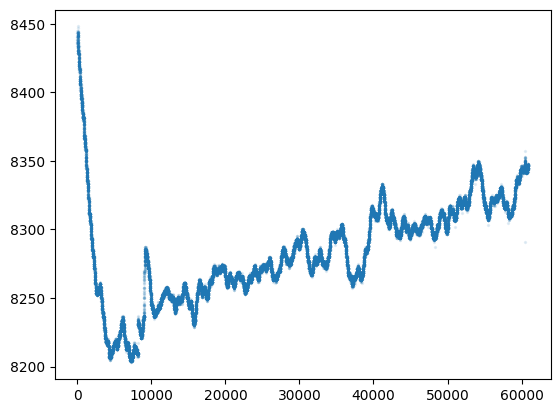

In [14]:
x = xs[3000:] - 2988 # - 60 to set rxn start at 0
y = data[3000:]
plt.scatter(x,y,s=2,alpha=0.1,marker='o')
plt.plot()

In [15]:
100 * 250/8450

2.9585798816568047

[]

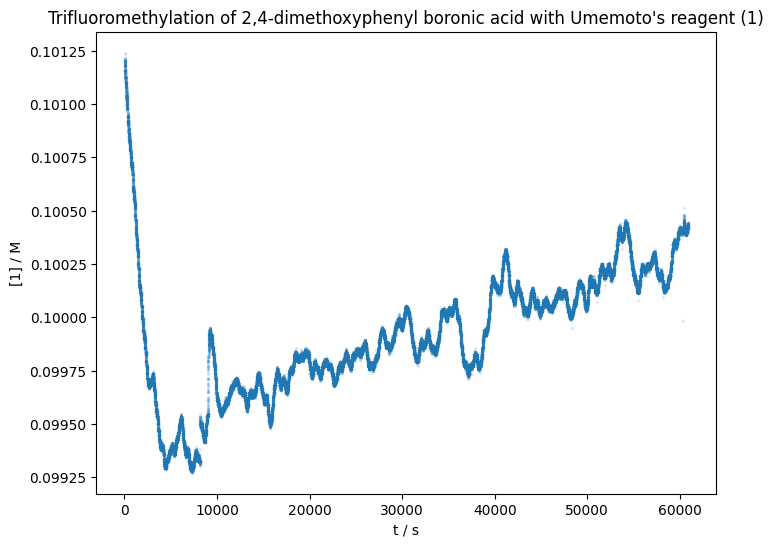

In [16]:
plt.figure(figsize=(8,6))

x = xs[3000:] - 2988 # - 60 to set rxn start at 0
y = np.array( inv_exp(data[3000:],*popt_exp) )
plt.scatter(x,y,s=2,alpha=0.1,marker='o')

plt.title("Trifluoromethylation of 2,4-dimethoxyphenyl boronic acid with Umemoto's reagent (1)")
plt.xlabel('t / s')
plt.ylabel('[1] / M')

plt.plot()

In [17]:
y[0]

0.1012164791770953

In [18]:
IR = pd.read_csv('trifluoro_trends.txt',sep="\t")

In [19]:
IR

,DateTime,Peak at 925 cm-1,Peak at 1648 cm-1,Peak at 1077 cm-1,Peak at 1124 cm-1,Peak at 1128 cm-1,Events
0,00:00:24.997,0.000090,0.000180,0.000146,0.000016,0.000048,Sample 1 acquired at 00:00:24
1,00:00:55.018,0.000610,0.000178,0.000914,0.000040,0.000007,NaN
2,00:01:24.969,-0.000049,0.000198,0.000024,0.000127,0.000094,NaN
3,00:01:54.921,-0.000466,0.000271,-0.000479,0.000124,0.000099,NaN
4,00:02:25.326,-0.000397,0.000169,-0.000409,0.000141,0.000094,NaN
...,...,...,...,...,...,...,...
2285,19:04:07.507,0.248587,0.361707,0.346128,0.096684,0.036498,NaN
2286,19:04:37.508,0.248405,0.358723,0.344056,0.098747,0.036642,NaN
2287,19:05:07.437,0.248420,0.356215,0.343471,0.098497,0.036578,NaN
2288,19:05:37.380,0.248374,0.359479,0.343575,0.099190,0.036728,NaN


<Axes: >

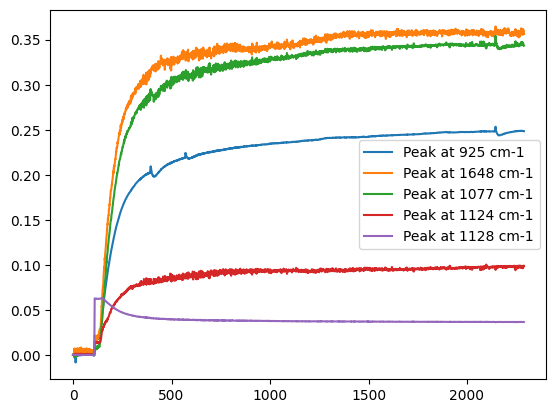

In [20]:
IR.plot()

In [21]:
ir_1124 = np.array(IR[IR.columns[4]])

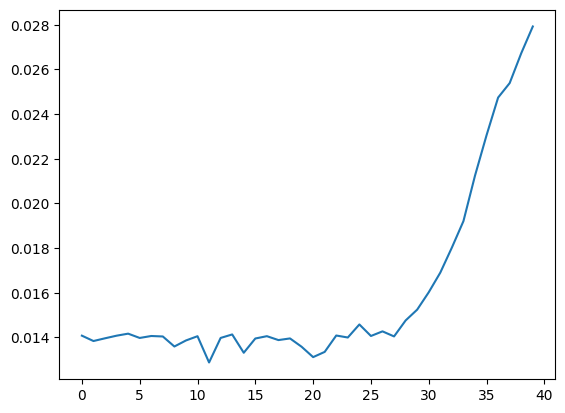

In [22]:
plt.plot(ir_1124[110:150])

In [23]:
ir_1124[135:145] # start at #137

array([0.01406683, 0.01427337, 0.01404694, 0.01476179, 0.01524619,
       0.01602463, 0.01690468, 0.01802412, 0.01920794, 0.02124443])

In [24]:
ir_clean_1124 = ir_1124[137:]

In [25]:
ir_clean_1648 = np.array(IR[IR.columns[2]])[137:]

In [26]:
ir_xs = np.array(range(0,len(ir_clean_1124)*30,30))

In [27]:
ir_xs.shape

(2153,)

In [28]:
ir_clean_1648.shape

(2153,)

In [29]:
ir_clean_1128 = np.array(IR[IR.columns[5]])[137:]

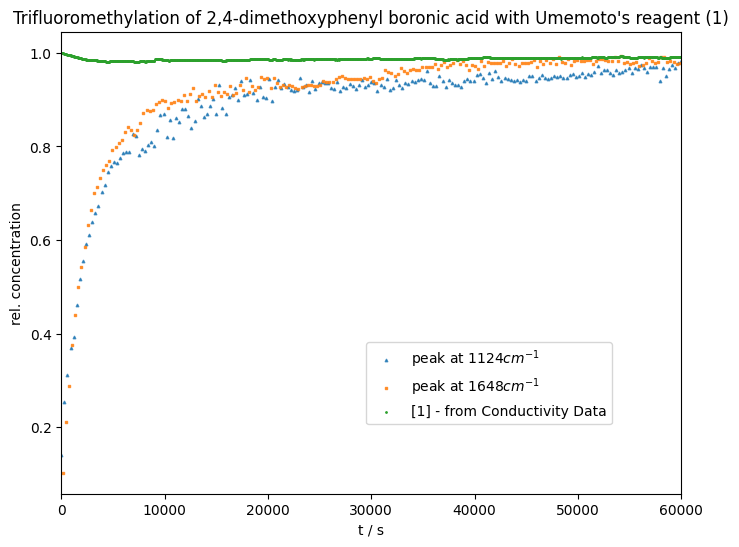

In [30]:
plt.figure(figsize=(8,6))

plt.scatter(ir_xs[::10], (ir_clean_1124[::10] / max(ir_clean_1124)) , marker='^', s=3, alpha=.8, label='peak at $1124 cm^{-1}$')
plt.scatter(ir_xs[5::10], (ir_clean_1648[5::10] / max(ir_clean_1648)) , marker='s', s=3, alpha=.8,label='peak at $1648 cm^{-1}$')

# 1128 probs overlaps
#plt.scatter(ir_xs[5::10], (ir_clean_1128[5::10] / max(ir_clean_1128)) , marker='s', s=3, alpha=.8,label='peak at $1128 cm^{-1}$')

plt.scatter(x[::60], y[::60] / y[0], s=1, label='[1] - from Conductivity Data')


plt.title("Trifluoromethylation of 2,4-dimethoxyphenyl boronic acid with Umemoto's reagent (1)")
plt.xlabel('t / s')
plt.ylabel('rel. concentration')
plt.xlim((0,60000))

plt.legend(loc = 4, borderaxespad=5)
plt.show()

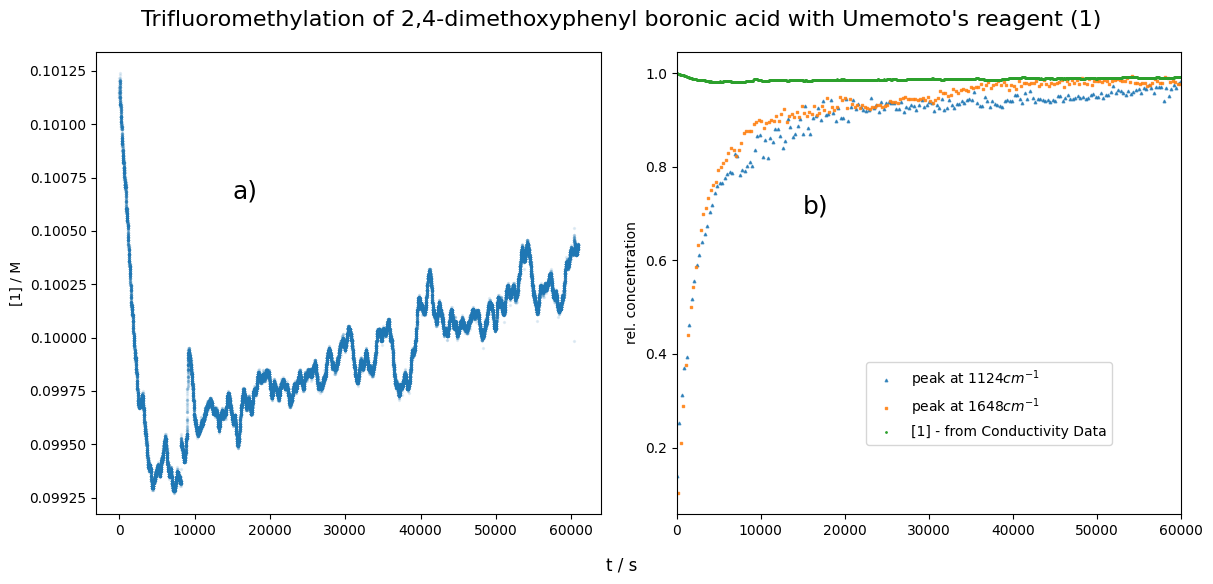

In [31]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(14,6))
fig.suptitle("Trifluoromethylation of 2,4-dimethoxyphenyl boronic acid with Umemoto's reagent (1)",fontsize=16,y=.95)
fig.subplots_adjust(wspace=0.15)

x = xs[3000:] - 2988 # - 60 to set rxn start at 0
y = np.array( inv_exp(data[3000:],*popt_exp) )
ax1.scatter(x,y,s=2,alpha=0.1,marker='o')
ax1.set_ylabel('[1] / M')
ax1.text(15000,0.10065,"a)",fontsize=18)

ax2.scatter(ir_xs[::10], (ir_clean_1124[::10] / max(ir_clean_1124)) , marker='^', s=3, alpha=.8, label='peak at $1124 cm^{-1}$')
ax2.scatter(ir_xs[5::10], (ir_clean_1648[5::10] / max(ir_clean_1648)) , marker='s', s=3, alpha=.8,label='peak at $1648 cm^{-1}$')

ax2.scatter(x[::60], y[::60] / y[0], s=1, label='[1] - from Conductivity Data')
ax2.text(15000,0.7,"b)",fontsize=18)

ax2.set_ylabel('rel. concentration')
ax2.set_xlim((0,60000))
ax2.legend(loc = 4, borderaxespad=5)


fig.supxlabel('t / s')

plt.show()

## Calibrating IR data for boronic acid

In [33]:
ir_clean_1128 = np.array(IR[IR.columns[5]])[137:]

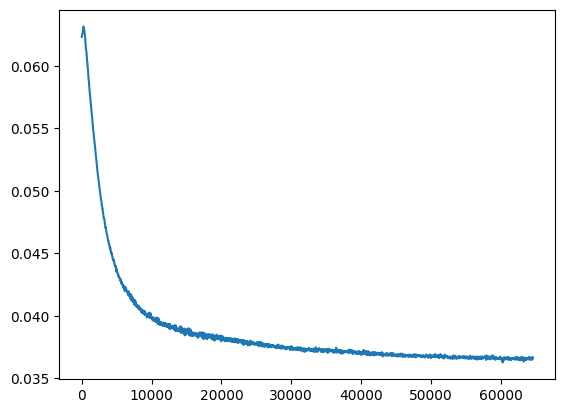

In [34]:
plt.plot(ir_xs,ir_clean_1128)

In [35]:
# boronic cal
m_b = 0.0341
n_b = m_b / 181.98
vols = np.array([2,4,6,8])
concs_b = 1000 * n_um / vols
abs_b = np.array([0.058,0.031,0.021,0.016])

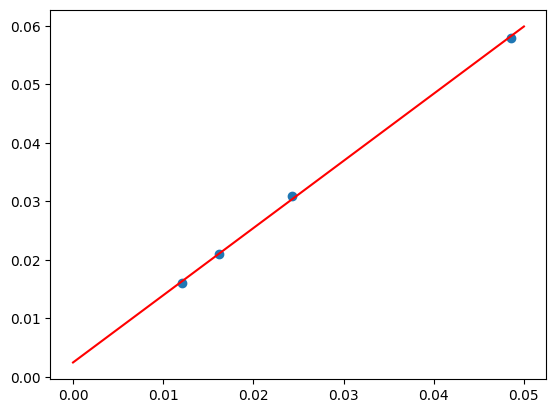

In [37]:
x = concs_b
y = abs_b

plt.scatter(x,y)

xs = np.linspace(0,0.05,20)

# straight line fit
lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(x.reshape(-1,1),y.reshape(-1,1))
slope_b = lin_reg.coef_[0][0]
int_b = lin_reg.intercept_[0]
score_b = lin_reg.score(x.reshape(-1,1),y.reshape(-1,1))
plt.plot(xs,(slope_b*xs + int_b),'r-', label=f'$r^2 = {score_b:.4f}$' )

In [38]:
boronic_1128 = ( ir_clean_1128 - int_b ) / slope_b

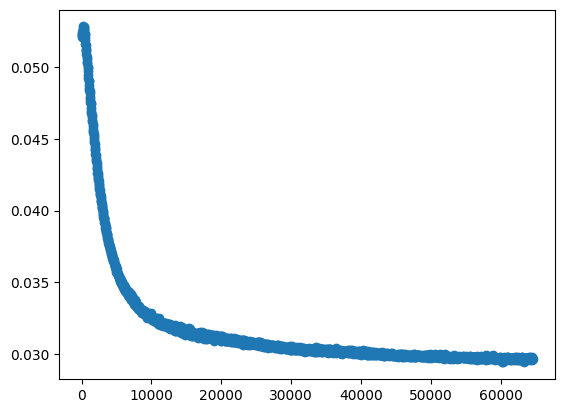

In [39]:
plt.scatter(ir_xs,boronic_1128)

In [40]:
1000 * 0.00116 / 12.32

0.09415584415584415